<a href="https://colab.research.google.com/github/NoSeUsarJS/Inteligencia-Artificial/blob/main/Tarea_4_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En la primera celda de código se importan las librerías a utilizar y se preparan los datos a utilizar.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


cifar10_mean, cifar10_std = [0.4914, 0.4822, 0.4465], [0.2470, 0.2435, 0.2616]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(cifar10_mean, cifar10_std)])


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Se implementa la función imshow para poder mostrar las imagenes junto a su clasificación y su predicción asociada

In [ ]:
def imshow(images, labels, predicted_labels=None):
    # Using torchvision to make a grid of the images
    img = torchvision.utils.make_grid(images)

    # Inverting the normalization
    img = img.permute(1, 2, 0).mul(torch.tensor(cifar10_std))
    img += torch.tensor(cifar10_mean)

    # Plotting the grid
    fig, ax = plt.subplots(figsize=(6, 24))
    plt.imshow(img)

    if predicted_labels is not None:
        # Outputing the predicted labels
        ax.set_xlabel('Predicted labels', fontsize=18, labelpad=12)
        ax.set_xticks(torch.arange(len(images)) * 35 + 20)
        ax.set_xticklabels([classes[predicted_labels[j]]
                            for j in range(len(images))], fontsize=14)

    # Outputing the ground truth labels
    gax = ax.secondary_xaxis('top')
    gax.set_xlabel('Ground truth', fontsize=18, labelpad=12)
    gax.set_xticks(torch.arange(len(images)) * 35 + 20)
    gax.set_xticklabels([classes[labels[j]]
                         for j in range(len(images))], fontsize=14)
    plt.show()

Función implementada por nosotros para medir la precisión.

In [ ]:
def model_accuracy (model, test_cases):
  total_cases = 0
  pass_cases = 0

  for images, labels in test_cases:
    predicted = torch.max(model(images), 1)[1]
    total_cases =+ 4
    for i in range(len(labels)):
      if labels[i] == predicted[i]:
        pass_cases =+ 1

  accuracy = float(pass_cases) * 100 / total_cases

  print ("Exactitud del modelo: " + str(accuracy) + "%")

Se terminan de preparar los datos para entrenamiento y testeo. El batch size es para configurar la cantidad de datos a mostrar.

In [ ]:
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

dataiter = iter(trainloader)
test_dataiter = iter(testloader)

Files already downloaded and verified


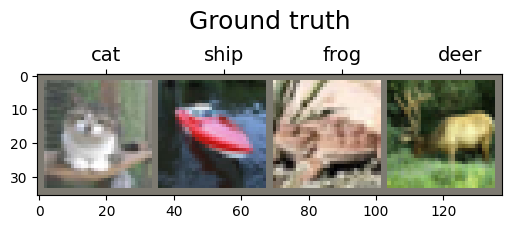

In [ ]:
images, labels = next(dataiter)
imshow(images, labels)

Se clona el repositorio con las clases, funciones y modelos necesarios, en otras palabras, se obtiene la arquitectura.

(Se clonó la rama add-license-1 porque la rama main estaba desincronizada con el colab.)

In [ ]:
!git clone -b add-license-1 https://github.com/SHI-Labs/Compact-Transformers
%cd Compact-Transformers/

Cloning into 'Compact-Transformers'...
remote: Enumerating objects: 438, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 438 (delta 97), reused 83 (delta 78), pack-reused 304
Receiving objects: 100% (438/438), 1.34 MiB | 5.54 MiB/s, done.
Resolving deltas: 100% (233/233), done.
/content/Compact-Transformers/Compact-Transformers


Se procede a realizar los entrenamientos ajustando los parámetros. Después de cada entrenamiento se genera un checkpoint.pth. Este archivo generado contiene los pesos de la red neuronal ya entrenada. Después se cargan los pesos en la estructura CCT correspondiente.

CCT N° 1
* Layers: 2
* N° Heads: 2
* MLP Ratio: 1
* N° Convolution Layers: 2
* Epochs: 10

La exactitud obtenida se desapareció debido a una mala manipulación de las celdas, sin embargo, era más baja en comparación a las del tutorial para estos parámetros.

In [ ]:
!python main.py \
       --model cct_2 \
       --conv-size 3 \
       --conv-layers 2 \
       --print-freq -1 \
       --epochs 10 \
       --workers 2 \
       ../cifar10


In [ ]:
from src.cct import cct_2

transformer_N1 = cct_2(img_size=32,
                    num_classes=10,
                    positional_embedding='learnable',
                    n_conv_layers=2,
                    kernel_size=3)

transformer_N1.load_state_dict(torch.load('checkpoint.pth'))
!rm checkpoint.pth

ModuleNotFoundError: ignored

CCT N° 2
* Layers: 4
* N° Heads: 2
* MLP Ratio: 1
* N° Convolution Layers: 2
* Epochs: 10

El best top fue de 70,79% para esta configuración. (vs el 91,45% de la tabla del tutorial).

In [ ]:
!python main.py \
       --model cct_4 \
       --conv-size 3 \
       --conv-layers 2 \
       --print-freq -1 \
       --epochs 10 \
       --workers 2 \
       ../cifar10


Files already downloaded and verified
Beginning training
[Epoch 1] 	 	 Top-1  34.84 	 	 Time: 0.50
[Epoch 2] 	 	 Top-1  42.98 	 	 Time: 1.01
[Epoch 3] 	 	 Top-1  50.84 	 	 Time: 1.50
[Epoch 4] 	 	 Top-1  56.35 	 	 Time: 2.01
[Epoch 5] 	 	 Top-1  58.62 	 	 Time: 2.50
[Epoch 6] 	 	 Top-1  60.83 	 	 Time: 3.01
[Epoch 7] 	 	 Top-1  65.16 	 	 Time: 3.51
[Epoch 8] 	 	 Top-1  66.44 	 	 Time: 4.00
[Epoch 9] 	 	 Top-1  69.08 	 	 Time: 4.50
[Epoch 10] 	 	 Top-1  70.79 	 	 Time: 4.99
Script finished in 4.99 minutes, best top-1: 70.79, final top-1: 70.79


In [ ]:
from src.cct import cct_4

transformer_N2 = cct_4(img_size=32,
                    num_classes=10,
                    positional_embedding='learnable',
                    n_conv_layers=2,
                    kernel_size=3)

transformer_N2.load_state_dict(torch.load('checkpoint.pth'))
!rm checkpoint.pth

CCT N° 3
* Layers: 6
* N° Heads: 4
* MLP Ratio: 2
* N° Convolution Layers: 2
* Epochs: 10

Por algún motivo no se registraron los epoch 9 y 10. Utilizando los epoch del 1 al 8 se obtiene que el best top es 76,14% (vs el 93,56% de la tabla del tutorial)

In [ ]:
!python main.py \
       --model cct_6 \
       --conv-size 3 \
       --conv-layers 2 \
       --print-freq -1 \
       --epochs 10 \
       --workers 2 \
       ../cifar10


Files already downloaded and verified
Beginning training
[Epoch 1] 	 	 Top-1  48.42 	 	 Time: 0.61
[Epoch 2] 	 	 Top-1  57.47 	 	 Time: 1.22
[Epoch 3] 	 	 Top-1  60.61 	 	 Time: 1.88
[Epoch 4] 	 	 Top-1  64.39 	 	 Time: 2.51
[Epoch 5] 	 	 Top-1  64.17 	 	 Time: 3.13
[Epoch 6] 	 	 Top-1  68.85 	 	 Time: 3.76
[Epoch 7] 	 	 Top-1  72.49 	 	 Time: 4.37
[Epoch 8] 	 	 Top-1  76.14 	 	 Time: 4.99


In [ ]:
from src.cct import cct_6

transformer_N3 = cct_6(img_size=32,
                    num_classes=10,
                    positional_embedding='learnable',
                    n_conv_layers=2,
                    kernel_size=3)

transformer_N3.load_state_dict(torch.load('checkpoint.pth'))
!rm checkpoint.pth

CCT N° 4
* Layers: 6
* N° Heads: 4
* MLP Ratio: 2
* N° Convolution Layers: 1
* Epochs: 10

El best top fue de 79,07%. (vs el 94,81% de la tabla del tutorial).

In [ ]:
!python main.py \
       --model cct_6 \
       --conv-size 3 \
       --conv-layers 1 \
       --print-freq -1 \
       --epochs 10 \
       --workers 2 \
       ../cifar10


Files already downloaded and verified
Beginning training
[Epoch 1] 	 	 Top-1  39.99 	 	 Time: 2.66
[Epoch 2] 	 	 Top-1  49.83 	 	 Time: 5.31
[Epoch 3] 	 	 Top-1  55.80 	 	 Time: 7.98
[Epoch 4] 	 	 Top-1  59.65 	 	 Time: 10.64
[Epoch 5] 	 	 Top-1  64.95 	 	 Time: 13.31
[Epoch 6] 	 	 Top-1  67.93 	 	 Time: 15.97
[Epoch 7] 	 	 Top-1  70.85 	 	 Time: 18.64
[Epoch 8] 	 	 Top-1  73.46 	 	 Time: 21.31
[Epoch 9] 	 	 Top-1  76.97 	 	 Time: 23.97
[Epoch 10] 	 	 Top-1  79.07 	 	 Time: 26.64
Script finished in 26.64 minutes, best top-1: 79.07, final top-1: 79.07


In [ ]:
from src.cct import cct_6

transformer_N4 = cct_6(img_size=32,
                    num_classes=10,
                    positional_embedding='learnable',
                    n_conv_layers=1,
                    kernel_size=3)

transformer_N4.load_state_dict(torch.load('checkpoint.pth'))
!rm checkpoint.pth

CCT N° 5
* Layers: 6
* N° Heads: 4
* MLP Ratio: 2
* N° Convolution Layers: 1
* Epochs: 25

El best top fue de 87,45%. (vs el 95,29% de la tabla del tutorial)

In [ ]:
!python main.py \
       --model cct_6 \
       --conv-size 3 \
       --conv-layers 1 \
       --print-freq -1 \
       --epochs 25 \
       --workers 2 \
       ../cifar10


Files already downloaded and verified
Beginning training
[Epoch 1] 	 	 Top-1  39.71 	 	 Time: 2.66
[Epoch 2] 	 	 Top-1  52.00 	 	 Time: 5.33
[Epoch 3] 	 	 Top-1  55.24 	 	 Time: 8.00
[Epoch 4] 	 	 Top-1  61.51 	 	 Time: 10.66
[Epoch 5] 	 	 Top-1  62.81 	 	 Time: 13.33
[Epoch 6] 	 	 Top-1  65.04 	 	 Time: 16.00
[Epoch 7] 	 	 Top-1  68.37 	 	 Time: 18.66
[Epoch 8] 	 	 Top-1  71.97 	 	 Time: 21.33
[Epoch 9] 	 	 Top-1  75.76 	 	 Time: 24.00
[Epoch 10] 	 	 Top-1  75.59 	 	 Time: 26.66
[Epoch 11] 	 	 Top-1  76.75 	 	 Time: 29.32
[Epoch 12] 	 	 Top-1  77.74 	 	 Time: 31.99
[Epoch 13] 	 	 Top-1  79.18 	 	 Time: 34.66
[Epoch 14] 	 	 Top-1  81.23 	 	 Time: 37.32
[Epoch 15] 	 	 Top-1  82.66 	 	 Time: 39.99
[Epoch 16] 	 	 Top-1  83.76 	 	 Time: 42.66
[Epoch 17] 	 	 Top-1  84.47 	 	 Time: 45.32
[Epoch 18] 	 	 Top-1  85.00 	 	 Time: 47.99
[Epoch 19] 	 	 Top-1  85.30 	 	 Time: 50.65
[Epoch 20] 	 	 Top-1  85.86 	 	 Time: 53.32
[Epoch 21] 	 	 Top-1  86.77 	 	 Time: 55.98
[Epoch 22] 	 	 Top-1  86.80 	 	

In [ ]:
from src.cct import cct_6

transformer_N5 = cct_6(img_size=32,
                    num_classes=10,
                    positional_embedding='learnable',
                    n_conv_layers=1,
                    kernel_size=3)

transformer_N5.load_state_dict(torch.load('checkpoint.pth'))
!rm checkpoint.pth

CCT N° 6
* Layers: 7
* N° Heads: 4
* MLP Ratio: 2
* N° Convolution Layers: 2
* Epochs: 10

El best top fue de 80,12%. (vs el 93,83% de la tabla del tutorial)

In [ ]:
!python main.py \
       --model cct_7 \
       --conv-size 3 \
       --conv-layers 2 \
       --print-freq -1 \
       --epochs 10 \
       --workers 2 \
       ../cifar10


Files already downloaded and verified
Beginning training
[Epoch 1] 	 	 Top-1  44.29 	 	 Time: 0.73
[Epoch 2] 	 	 Top-1  55.51 	 	 Time: 1.44
[Epoch 3] 	 	 Top-1  61.52 	 	 Time: 2.15
[Epoch 4] 	 	 Top-1  62.79 	 	 Time: 2.86
[Epoch 5] 	 	 Top-1  65.31 	 	 Time: 3.58
[Epoch 6] 	 	 Top-1  69.21 	 	 Time: 4.29
[Epoch 7] 	 	 Top-1  72.08 	 	 Time: 5.00
[Epoch 8] 	 	 Top-1  76.26 	 	 Time: 5.72
[Epoch 9] 	 	 Top-1  77.60 	 	 Time: 6.43
[Epoch 10] 	 	 Top-1  80.12 	 	 Time: 7.15
Script finished in 7.15 minutes, best top-1: 80.12, final top-1: 80.12


In [ ]:
from src.cct import cct_7

transformer_N6 = cct_7(img_size=32,
                    num_classes=10,
                    positional_embedding='learnable',
                    n_conv_layers=2,
                    kernel_size=3)

transformer_N6.load_state_dict(torch.load('checkpoint.pth'))
!rm checkpoint.pth

CCT N° 7
* Layers: 7
* N° Heads: 4
* MLP Ratio: 2
* N° Convolution Layers: 1
* Epochs: 10

Google colab no permitió continuar con el uso de la gpu en mitad del procesamiento, por lo que solo se llegó hasta el epoch 5. Para este caso el best top fue de 64,14%. (vs el 94,78% de la tabla del tutorial)

In [ ]:
!python main.py \
       --model cct_7 \
       --conv-size 3 \
       --conv-layers 1 \
       --print-freq -1 \
       --epochs 10 \
       --workers 2 \
       ../cifar10


Files already downloaded and verified
Beginning training
[Epoch 1] 	 	 Top-1  39.23 	 	 Time: 3.08
[Epoch 2] 	 	 Top-1  50.69 	 	 Time: 6.16
[Epoch 3] 	 	 Top-1  59.13 	 	 Time: 9.25
[Epoch 4] 	 	 Top-1  60.87 	 	 Time: 12.34
[Epoch 5] 	 	 Top-1  64.14 	 	 Time: 15.42


In [ ]:
from src.cct import cct_7

transformer_N7 = cct_7(img_size=32,
                    num_classes=10,
                    positional_embedding='learnable',
                    n_conv_layers=1,
                    kernel_size=3)

transformer_N7.load_state_dict(torch.load('checkpoint.pth'))
!rm checkpoint.pth

Las siguientes celdas habían sido creadas con el objetivo de medir la precisión de otra manera, pero google al quitar el acceso a la gpu, no permitió el uso de estas celdas.

Función de las celdas:
por medio de la función model_accuracy (que recibe de parámetros el modelo y los datos de prueba) se obtiene lo siguiente:

predicciones_correctas*100%/predicciones_totales

In [ ]:
#CCT N°1
print("Para CCT N°1")
model_accuracy(transformer_N1, testloader)

In [ ]:
#CCT N°2
print("Para CCT N°2")
model_accuracy(transformer_N2, testloader)

In [ ]:
#CCT N°3
print("Para CCT N°3")
model_accuracy(transformer_N3, testloader)

In [ ]:
#CCT N°4
print("Para CCT N°4")
model_accuracy(transformer_N4, testloader)

In [ ]:
#CCT N°5
print("Para CCT N°5")
model_accuracy(transformer_N5, testloader)

In [ ]:
#CCT N°6
print("Para CCT N°6")
model_accuracy(transformer_N6, testloader)

In [ ]:
#CCT N°7
print("Para CCT N°7")
model_accuracy(transformer_N7, testloader)

Haciendo una comparativa de los entrenamientos.

Claramente los entrenamientos realizados en este colab presentan menores best top que los del tutorial, esto debido principalmente a la baja cantidad de epoch en relación a los del tutorial.

De igual manera, se puede analizar tanto en el tutorial como en este colab, que hay una configuración para la CCT que otorga un best top, y es la CCT N°5, aunque se le puede atribuir a que tiene mayor número de epochs, o en otras palabras, un entrenamiento más largo.

Analizando las demás CCT, se observa que la configuración de 6 capas, 4 cabezas, un ratio MLP de 2 y solo 1 capa de convolución produce mejores resultados. Sin embargo, esto implica en un mayor tiempo de entrenamiento.

Explicación arquitectura:

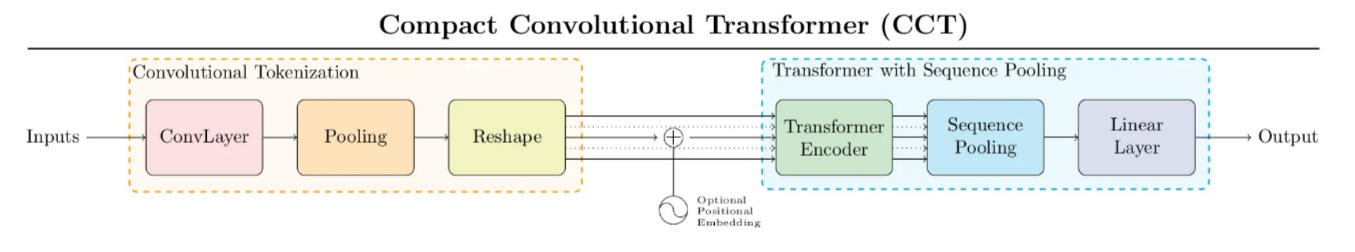

Primero, los inputs ingresan a la capa de convolución donde se resaltan sus caracteristicas más importantes. Estas capas van aplicando filtros a zonas pequeñas de la imagen para detectar patrones.

Se terminan aplicando las partes típicas de un transformer para terminar aplanando los datos y mostrar el output.